In [1]:
import pandas as pd
import numpy as np

In [146]:
telco = pd.read_csv('churn.csv')

# Exploratory Data Analysis

## Breakdown of users who churned/did not churn

In [147]:
telco['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

## Grouping by the churn to examine Customer Service Calls and  Number vMailMessages

In [148]:
telco2 = telco[['CustServ Calls','VMail Message','Churn?']]

In [149]:
telco2.groupby('Churn?').mean()

,CustServ Calls,VMail Message
Churn?,,
False.,1.449825,8.604561
True.,2.229814,5.115942


Now, let's examine the standard deviation.

In [150]:
telco2.groupby('Churn?').std()

,CustServ Calls,VMail Message
Churn?,,
False.,1.163883,13.913125
True.,1.853275,11.860138


## Grouping by State to Examine Churn

In [151]:
telco3 = telco[['State','Churn?']]

In [152]:
telco3.groupby('State')['Churn?'].value_counts()

State  Churn?
AK     False.    49
       True.      3
AL     False.    72
       True.      8
AR     False.    44
       True.     11
AZ     False.    60
       True.      4
CA     False.    25
       True.      9
CO     False.    57
       True.      9
CT     False.    62
       True.     12
DC     False.    49
       True.      5
DE     False.    52
       True.      9
FL     False.    55
       True.      8
GA     False.    46
       True.      8
HI     False.    50
       True.      3
IA     False.    41
       True.      3
ID     False.    64
       True.      9
IL     False.    53
       True.      5
                 ..
OK     False.    52
       True.      9
OR     False.    67
       True.     11
PA     False.    37
       True.      8
RI     False.    59
       True.      6
SC     False.    46
       True.     14
SD     False.    52
       True.      8
TN     False.    48
       True.      5
TX     False.    54
       True.     18
UT     False.    62
       True.     10
VA    

## Data Visualization - Distribution Plots 

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

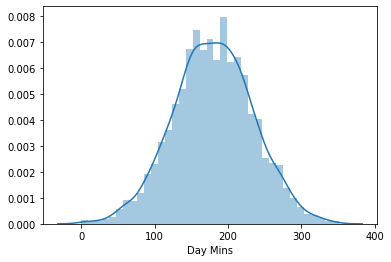

In [154]:
sns.distplot(telco['Day Mins'])

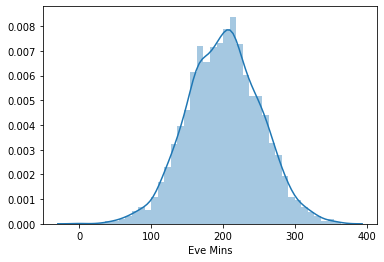

In [155]:
sns.distplot(telco['Eve Mins'])

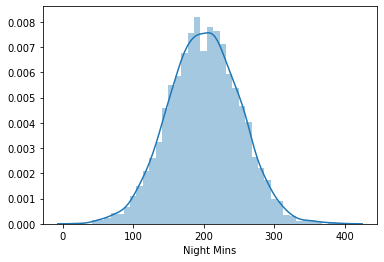

In [156]:
sns.distplot(telco['Night Mins'])

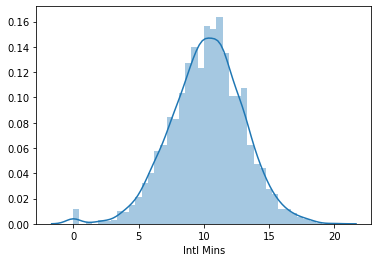

In [157]:
sns.distplot(telco['Intl Mins'])

It appears that the distribution for all four variables above are normal, therefore no transformation is needed.

## Data Visualization - Boxplots

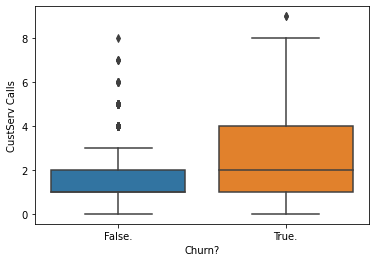

In [158]:
sns.boxplot(x='Churn?',y='CustServ Calls',data=telco)

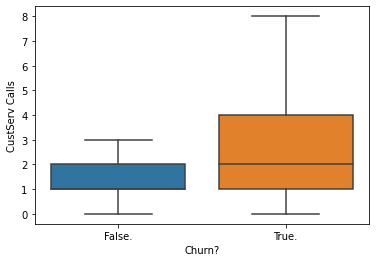

In [159]:
# no outliers
sns.boxplot(x='Churn?',y='CustServ Calls',data=telco,showfliers=False)

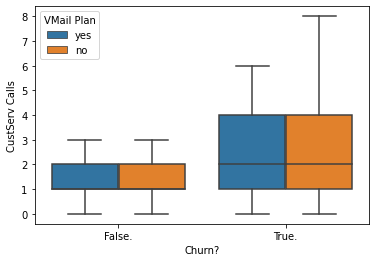

In [160]:
sns.boxplot(x='Churn?',y='CustServ Calls',data=teleco,showfliers=False,hue='VMail Plan')

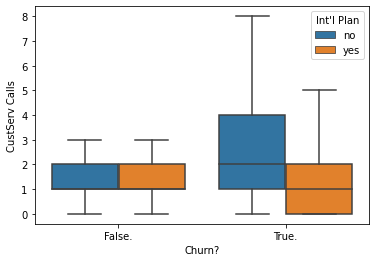

In [161]:
sns.boxplot(x='Churn?',y='CustServ Calls',data=teleco,showfliers=False,hue='Int\'l Plan')

# Data Preprocessing

##  Encoding Binary Features

In [162]:
telco.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [163]:
# Method #1
telco['Int\'l Plan'].replace({'no':0,'yes':1})

0       0
1       0
2       0
3       1
4       1
5       1
6       0
7       1
8       0
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    1
3305    0
3306    0
3307    0
3308    0
3309    1
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    1
3318    0
3319    0
3320    1
3321    0
3322    0
3323    0
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    1
3332    0
Name: Int'l Plan, Length: 3333, dtype: int64

In [164]:
# Method #2
from sklearn.preprocessing import LabelEncoder
telco['Int\'l Plan'] = LabelEncoder().fit_transform(telco['Int\'l Plan'])
telco['Int\'l Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Int'l Plan, dtype: int64

In [165]:
telco['VMail Plan'] = LabelEncoder().fit_transform(telco['VMail Plan'])
telco['VMail Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: VMail Plan, dtype: int64

In [166]:
telco['Churn?'] = LabelEncoder().fit_transform(telco['Churn?'])
telco['Churn?'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?, dtype: int64

## One Hot Encoding 

In [167]:
telco = pd.concat([telco, pd.get_dummies(telco['State'])],axis=1)

In [168]:
telco.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
telco['Intl Calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl Calls, dtype: float64

In [171]:
telco['Night Mins'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night Mins, dtype: float64

In [172]:
telco_scaled = StandardScaler().fit_transform(telco[['Intl Calls','Night Mins']])

In [173]:
telco_scaled_df = pd.DataFrame(telco_scaled, columns=['Intl Calls','Night Mins'])

In [174]:
telco['Intl Calls'] = telco_scaled_df['Intl Calls']
telco['Night Mins'] = telco_scaled_df['Night Mins']

## Feature Selection 

1) We want to drop irrelevant columns such as phone numbers, social security and account number.

In [175]:
telco.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [176]:
telco = telco.drop(['Phone','Area Code'],axis=1)

2) We want to drop highly correlated features.

In [179]:
telco = telco.drop(['State'],axis=1)

In [183]:
telco[['Account Length', 'Int\'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?']].corr()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
Account Length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Int'l Plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail Plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Eve Calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Eve Charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


We see that Day Mins and Day Charge, Eve Mins and Eve Charge, and Night Mins and Night Charge are highly correlated, which makes sense but we need to remove one of them.

## Feature Engineering

We should consult with business and subject matter experts to create new features to help improve model performance, such as:

* Total Mins
* Ratio between Mins and Charge

# Data Modeling

In [193]:
features = ['Account Length','VMail Message','Day Mins','Eve Mins',
            'Night Mins','Intl Mins','CustServ Calls','Int\'l Plan',
            'VMail Plan','Day Calls','Day Charge','Eve Calls',
            'Eve Charge','Night Calls','Night Charge','Intl Calls',
            'Intl Charge']

In [191]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(telco[features],telco['Churn?'],test_size=0.3)

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression

In [226]:
clf = LogisticRegression()

In [257]:
clf.fit(X_train,y_train)

/Users/janezhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [258]:
y_pred = clf.predict(X_test)

In [259]:
clf.score(X_test,y_test)

0.863

In [260]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[853,  11],
       [126,  10]])

In [298]:
print('The recall TP/(TP+FN) is', 100*round(confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1]+confusion_matrix(y_test,y_pred)[1][0]),2))

The recall TP/(TP+FN) is 7.000000000000001


In [297]:
print('The precision TP/(TP+FP) is', 100*round(confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1]+confusion_matrix(y_test,y_pred)[0][1]),2))

The precision TP/(TP+FP) is 48.0


In [293]:
from sklearn.metrics import precision_score
print('The precision score is', round(precision_score(y_test,y_pred)*100,2),'%')

The precision score is 47.62 %


In [291]:
from sklearn.metrics import recall_score
print('The recall score is', round(recall_score(y_test,y_pred)*100,2),'%')

The recall score is 7.35 %


In [313]:
y_test_prob = clf.predict_proba(X_test)[:,1]

In [317]:
# the probability of predicted churning
y_test_prob[:5]

array([0.09735573, 0.06256422, 0.06131806, 0.12049907, 0.1532393 ])

In [314]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)

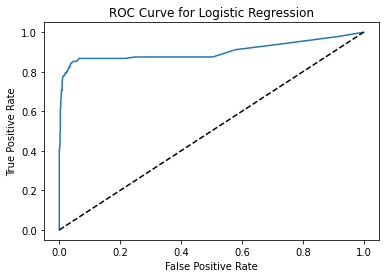

In [354]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [348]:
from sklearn.metrics import roc_auc_score
print('The Area Under the Curve is','%.2f'%roc_auc_score(y_test,y_test_prob))

The Area Under the Curve is 0.75


In [349]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.12738853503184716

## Decision Tree

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
clf2 = RandomForestClassifier()

In [265]:
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [266]:
y_pred2 = clf2.predict(X_test)

In [267]:
clf2.score(X_test,y_test)

0.958

In [268]:
confusion_matrix(y_test,y_pred2)

array([[856,   8],
       [ 34, 102]])

In [269]:
print('The recall TP/(TP+FN) is', 100*round(confusion_matrix(y_test,y_pred2)[1][1]/(confusion_matrix(y_test,y_pred2)[1][1]+confusion_matrix(y_test,y_pred2)[1][0]),2))

The recall TP/(TP+FN) is 75.0


In [270]:
print('The precision TP/(TP+FP) is', 100*round(confusion_matrix(y_test,y_pred2)[1][1]/(confusion_matrix(y_test,y_pred2)[1][1]+confusion_matrix(y_test,y_pred2)[0][1]),2))

The precision TP/(TP+FP) is 93.0


In [331]:
print('The precision score is', round(precision_score(y_test,y_pred2)*100,2),'%')

The precision score is 92.73 %


In [333]:
print('The recall score is', round(recall_score(y_test,y_pred2)*100,2),'%')

The recall score is 75.0 %


In [336]:
pred_prob2 = clf2.predict_proba(X_test)[:,1]

In [337]:
fpr, tpr, thresholds = roc_curve(y_test,pred_prob2)

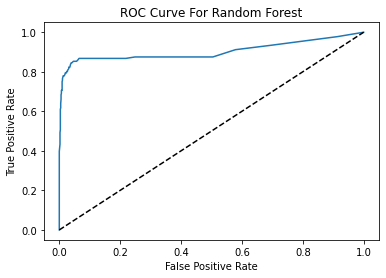

In [353]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve For Random Forest')
plt.show()

In [347]:
print('The Area Under the Curve is','%.2f'%(roc_auc_score(y_test,pred_prob2)))

The Area Under the Curve is 0.90


In [355]:
print('%.2f'%f1_score(y_test,y_pred2))

0.83


## Support Vector Machine

In [272]:
from sklearn.svm import SVC

In [273]:
svc = SVC()

In [274]:
svc.fit(X_train,y_train)

SVC()

In [275]:
y_pred3 = svc.predict(X_test)

In [276]:
svc.score(X_test,y_test)

0.866

In [277]:
confusion_matrix(y_test,y_pred3)

array([[864,   0],
       [134,   2]])

In [278]:
print('The recall TP/(TP+FN) is', 100*round(confusion_matrix(y_test,y_pred3)[1][1]/(confusion_matrix(y_test,y_pred3)[1][1]+confusion_matrix(y_test,y_pred3)[1][0]),2))

The recall TP/(TP+FN) is 1.0


In [279]:
print('The precision TP/(TP+FP) is', 100*round(confusion_matrix(y_test,y_pred3)[1][1]/(confusion_matrix(y_test,y_pred3)[1][1]+confusion_matrix(y_test,y_pred3)[0][1]),2))

The precision TP/(TP+FP) is 100.0


In [352]:
f1_score(y_test,y_pred3)

0.028985507246376812

## Model Tuning - GridSearchCV (for Decision Trees)

In [356]:
from sklearn.model_selection import GridSearchCV

In [362]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [363]:
grid_search = GridSearchCV(clf2,param_grid)

In [364]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

In [365]:
grid_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}

## Model Tuning - RandomizedSearchCV(for Decision Trees)
As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In [366]:
from sklearn.model_selection import RandomizedSearchCV

In [383]:
param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [384]:
random_search = RandomizedSearchCV(clf2,param_dist)

In [385]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [386]:
random_search.best_params_

{'max_features': 9,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

## Important Features

In [394]:
importance = clf2.feature_importances_

In [397]:
sorted_index = np.argsort(importance)

In [399]:
labels = X_train.columns[sorted_index]

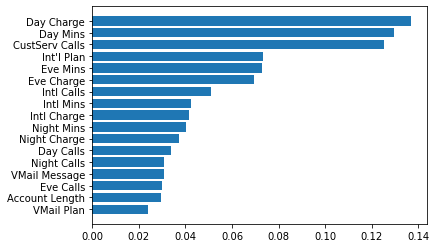

In [401]:
plt.barh(range(X_train.shape[1]),importance[sorted_index],tick_label = labels)
plt.show()